# Households not qualified for ACP but are unconnected

Not eligible and unconnected households (hh) were estimated from ACS PUMS. 

Eligible is defined as either hh with annual income below the 200% poverty level and/or receiving one of a set of government programs
Unconnected HH is defined as hh with no access to the internet, cell internet only, or dial-up only

Not eligible and unconnected hh by state can be found below and [here](https://docs.google.com/spreadsheets/d/1LEYCVPe2KZfPNjUhD-fN-RIyvn3Mj7VlDVpwEze-8wQ/edit#gid=0)

HH's income distribution is below. Income average is about $80 000


In [ ]:
'acp_not_elegible_connectivity_income_state.csv' comes from data base using the following query?

" SELECT
    hh.state_id,
    hh.serialno,
    MAX(CASE
      WHEN pop.hins4 = '2' AND hh.fs = '2' AND pop.pap = 0 AND pop.ssip = 0 AND pop.povpip > 200
        THEN hh.wgtp
      ELSE 0 END) AS acp_not_eligible,
    CASE
      WHEN accessinet = '3'
        THEN TRUE
      ELSE FALSE END AS no_internet,
    CASE
      WHEN accessinet = '1' AND hispeed = '2' AND othsvcex = '2' AND dialup = '2' AND satellite = '2'
        THEN TRUE
      ELSE FALSE END AS cell_internet_only,
    CASE
      WHEN accessinet = '1' AND hispeed = '2' AND othsvcex = '2' AND dialup = '1' AND satellite = '2'
        THEN TRUE
      ELSE FALSE END AS dial_up_only,
    MAX(CASE
      WHEN pop.hins4 = '2' AND hh.fs = '2' AND pop.pap = 0 AND pop.ssip = 0 AND pop.povpip > 200
        THEN hh.hincp
      ELSE 0 END) AS hh_income
 
    
  FROM
    dl.pums_households_2020 hh

  LEFT JOIN dl.pums_population_2020 pop
  ON hh.puma_id = pop.puma_id
  AND hh.serialno = pop.serialno

  GROUP BY
    hh.state_id,
    hh.serialno,
    hh.accessinet,
    hh.hispeed,
    hh.othsvcex,
    hh.dialup,
    hh.satellite 
    
    "

# Note


- [How Can the United States Address Broadband Affordability?](https://www.pewtrusts.org/en/research-and-analysis/articles/2022/04/29/how-can-the-united-states-address-broadband-affordability)
    - for service alone range from under $ \$ $ 50 to nearly \$ 70.
    - Other estimates have placed the total average monthly cost at nearly \$85 per month.
    - The Pew Research Center last year found that:
        - although only 1% of adults with annual incomes over $75,000 do not use the internet
        
        - 14% of those with annual incomes under \$ 30,000 are not online. And although only 
        - 8% of adults with annual household incomes of over $75,000 do not have a home broadband subscription
        - 43% of adults with annual household incomes under \$30,000 do not have one (see Table 1). 
        
The lower limit of the income for the not elegible unconnected is about \$22 000 . 

According to the report from Pew Reserach, 93\% fo the the adults in hh with incomes between $\$$ 50 000 and \$ 75 000 use internet.  

In [8]:
import pandas as pd

In [14]:
infile='acp_not_elegible_connectivity_income_state_m.csv'
df=pd.read_csv(infile)
print(df.info())
df.head()

/var/folders/rh/4xd1337512l1025llqtt0d2h0000gn/T/ipykernel_29608/3054697989.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(infile)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7484462 entries, 0 to 7484461
Data columns (total 7 columns):
 #   Column              Dtype  
---  ------              -----  
 0   state_id            int64  
 1   serialno            object 
 2   acp_not_eligible    int64  
 3   no_internet         bool   
 4   cell_internet_only  bool   
 5   dial_up_only        bool   
 6   hh_income           float64
dtypes: bool(3), float64(1), int64(2), object(1)
memory usage: 249.8+ MB
None


,state_id,serialno,acp_not_eligible,no_internet,cell_internet_only,dial_up_only,hh_income
0,1,2016000000064,21,False,False,False,36610.0
1,1,2016000000080,19,True,False,False,45800.0
2,1,2016000000107,34,False,False,False,65000.0
3,1,2016000000134,25,False,False,False,60900.0
4,1,2016000000180,4,False,False,False,82570.0


In [15]:
da=df[((df['no_internet']==True)  | (df['cell_internet_only']==True ) | (df['dial_up_only']==True ))]
da=da[['state_id','acp_not_eligible']].groupby('state_id').sum()
da=da.reset_index()
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   state_id          52 non-null     int64
 1   acp_not_eligible  52 non-null     int64
dtypes: int64(2)
memory usage: 960.0 bytes


In [16]:
fi=pd.read_csv('fips_states.csv')
dx=da.merge(fi,on='state_id',how='inner')
dx

,state_id,acp_not_eligible,Name,Official USPS Code
0,1,268434,Alabama,AL
1,2,35670,Alaska,AK
2,4,271422,Arizona,AZ
3,5,176234,Arkansas,AR
4,6,1166891,California,CA
5,8,195216,Colorado,CO
6,9,130878,Connecticut,CT
7,10,39907,Delaware,DE
8,11,23138,District of Columbia,DC
9,12,784989,Florida,FL


# Income distributions

In [17]:
ls *incom*csv

acp_not_elegible_connectivity_income_state.csv
acp_not_elegible_connectivity_income_state_m.csv
ps_puma_income_bucket_connectivity.csv


In [18]:
di=df[((df['no_internet']==True)  | (df['cell_internet_only']==True ) | (df['dial_up_only']==True ))]
di=di[['state_id','serialno','acp_not_eligible','hh_income']]
di=di[di['acp_not_eligible']!=0]
di.fillna(0,inplace=True)
di=di[di['hh_income']!=0]
di

,state_id,serialno,acp_not_eligible,hh_income
1,1,2016000000080,19,45800.0
57,1,2016000003584,21,117500.0
60,1,2016000003735,17,82000.0
67,1,2016000004217,20,54000.0
77,1,2016000004680,11,30000.0
...,...,...,...,...
7426490,56,2020HU1112844,12,390000.0
7426491,56,2020HU1113707,1,222090.0
7426493,56,2020HU1114404,16,50600.0
7426528,56,2020HU1130977,2,97680.0


<AxesSubplot: >

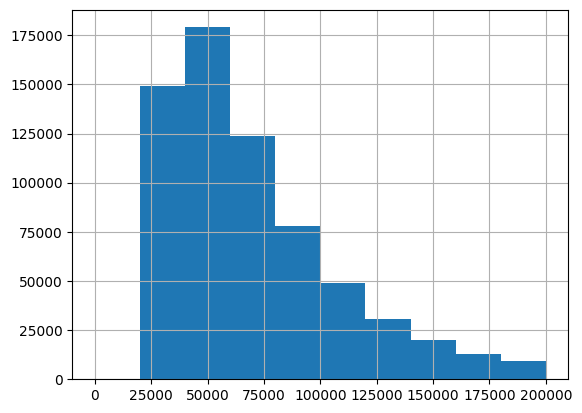

In [19]:
di['hh_income'].hist(range=[0,200000])

In [20]:
di['hh_income'].describe()

count    6.835040e+05
mean     8.163196e+04
std      7.405410e+04
min      2.220000e+04
25%      4.150000e+04
50%      6.090000e+04
75%      9.400000e+04
max      2.211000e+06
Name: hh_income, dtype: float64

In [21]:
da['acp_not_eligible'].sum()

13553742